In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error 
import pickle

import warnings
warnings.filterwarnings('ignore')

In [231]:
df = pd.read_csv (r'/Users/da_mac_41_/Documents/insuranceses.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,1,10600.54830
1333,18,0,31.920,0,0,0,2205.98080
1334,18,0,36.850,0,0,2,1629.83350
1335,21,0,25.800,0,0,3,2007.94500


In [232]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,1,10600.54830
1333,18,0,31.920,0,0,0,2205.98080
1334,18,0,36.850,0,0,2,1629.83350
1335,21,0,25.800,0,0,3,2007.94500


In [116]:
df.charges = df['charges'].astype(int)
df.bmi = df['bmi'].astype(int)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


In [234]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [235]:
df.duplicated().sum()

0

In [236]:
df = df.drop_duplicates()

In [164]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [237]:
label_encoder = preprocessing.LabelEncoder()

df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])

In [238]:
df['sex'].unique()

array([0, 1])

In [239]:
df['smoker'].unique()

array([1, 0])

In [240]:
df['region'].unique()

array([3, 2, 1, 0])

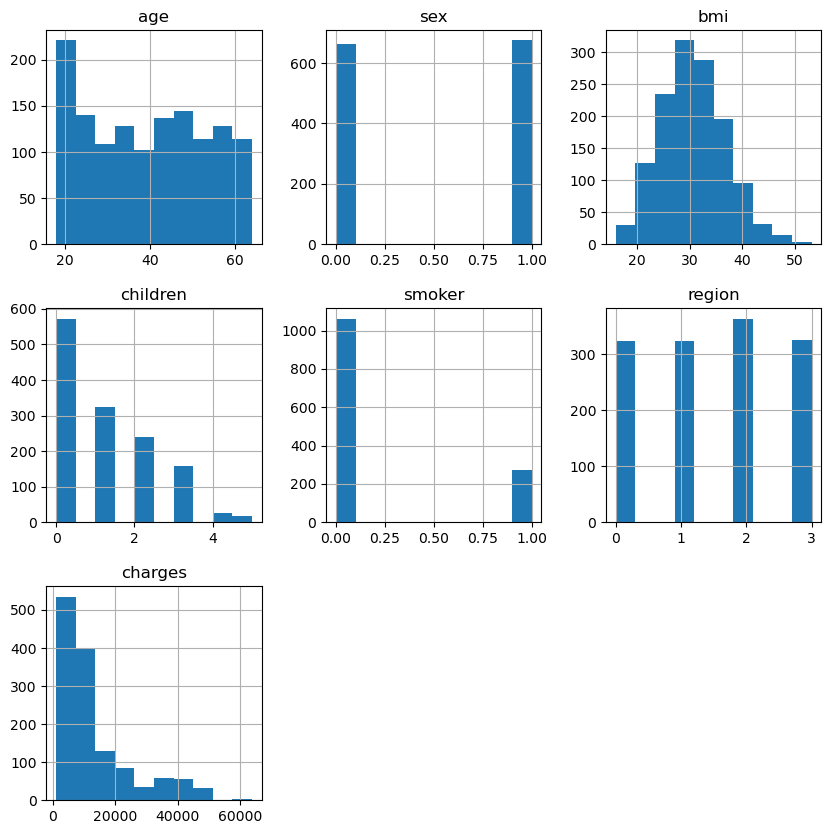

In [241]:
features = ['age','sex','bmi','children','smoker','region','charges'] # create a list of all numerical features
df[features].hist(figsize=(10,10));

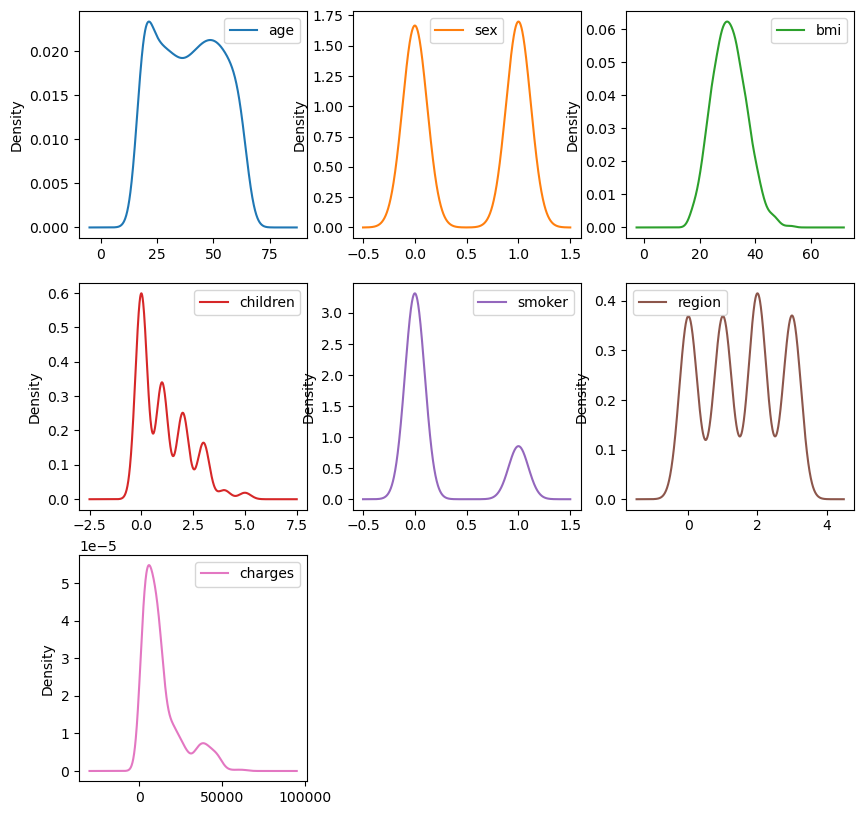

In [242]:
df[features].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 10));

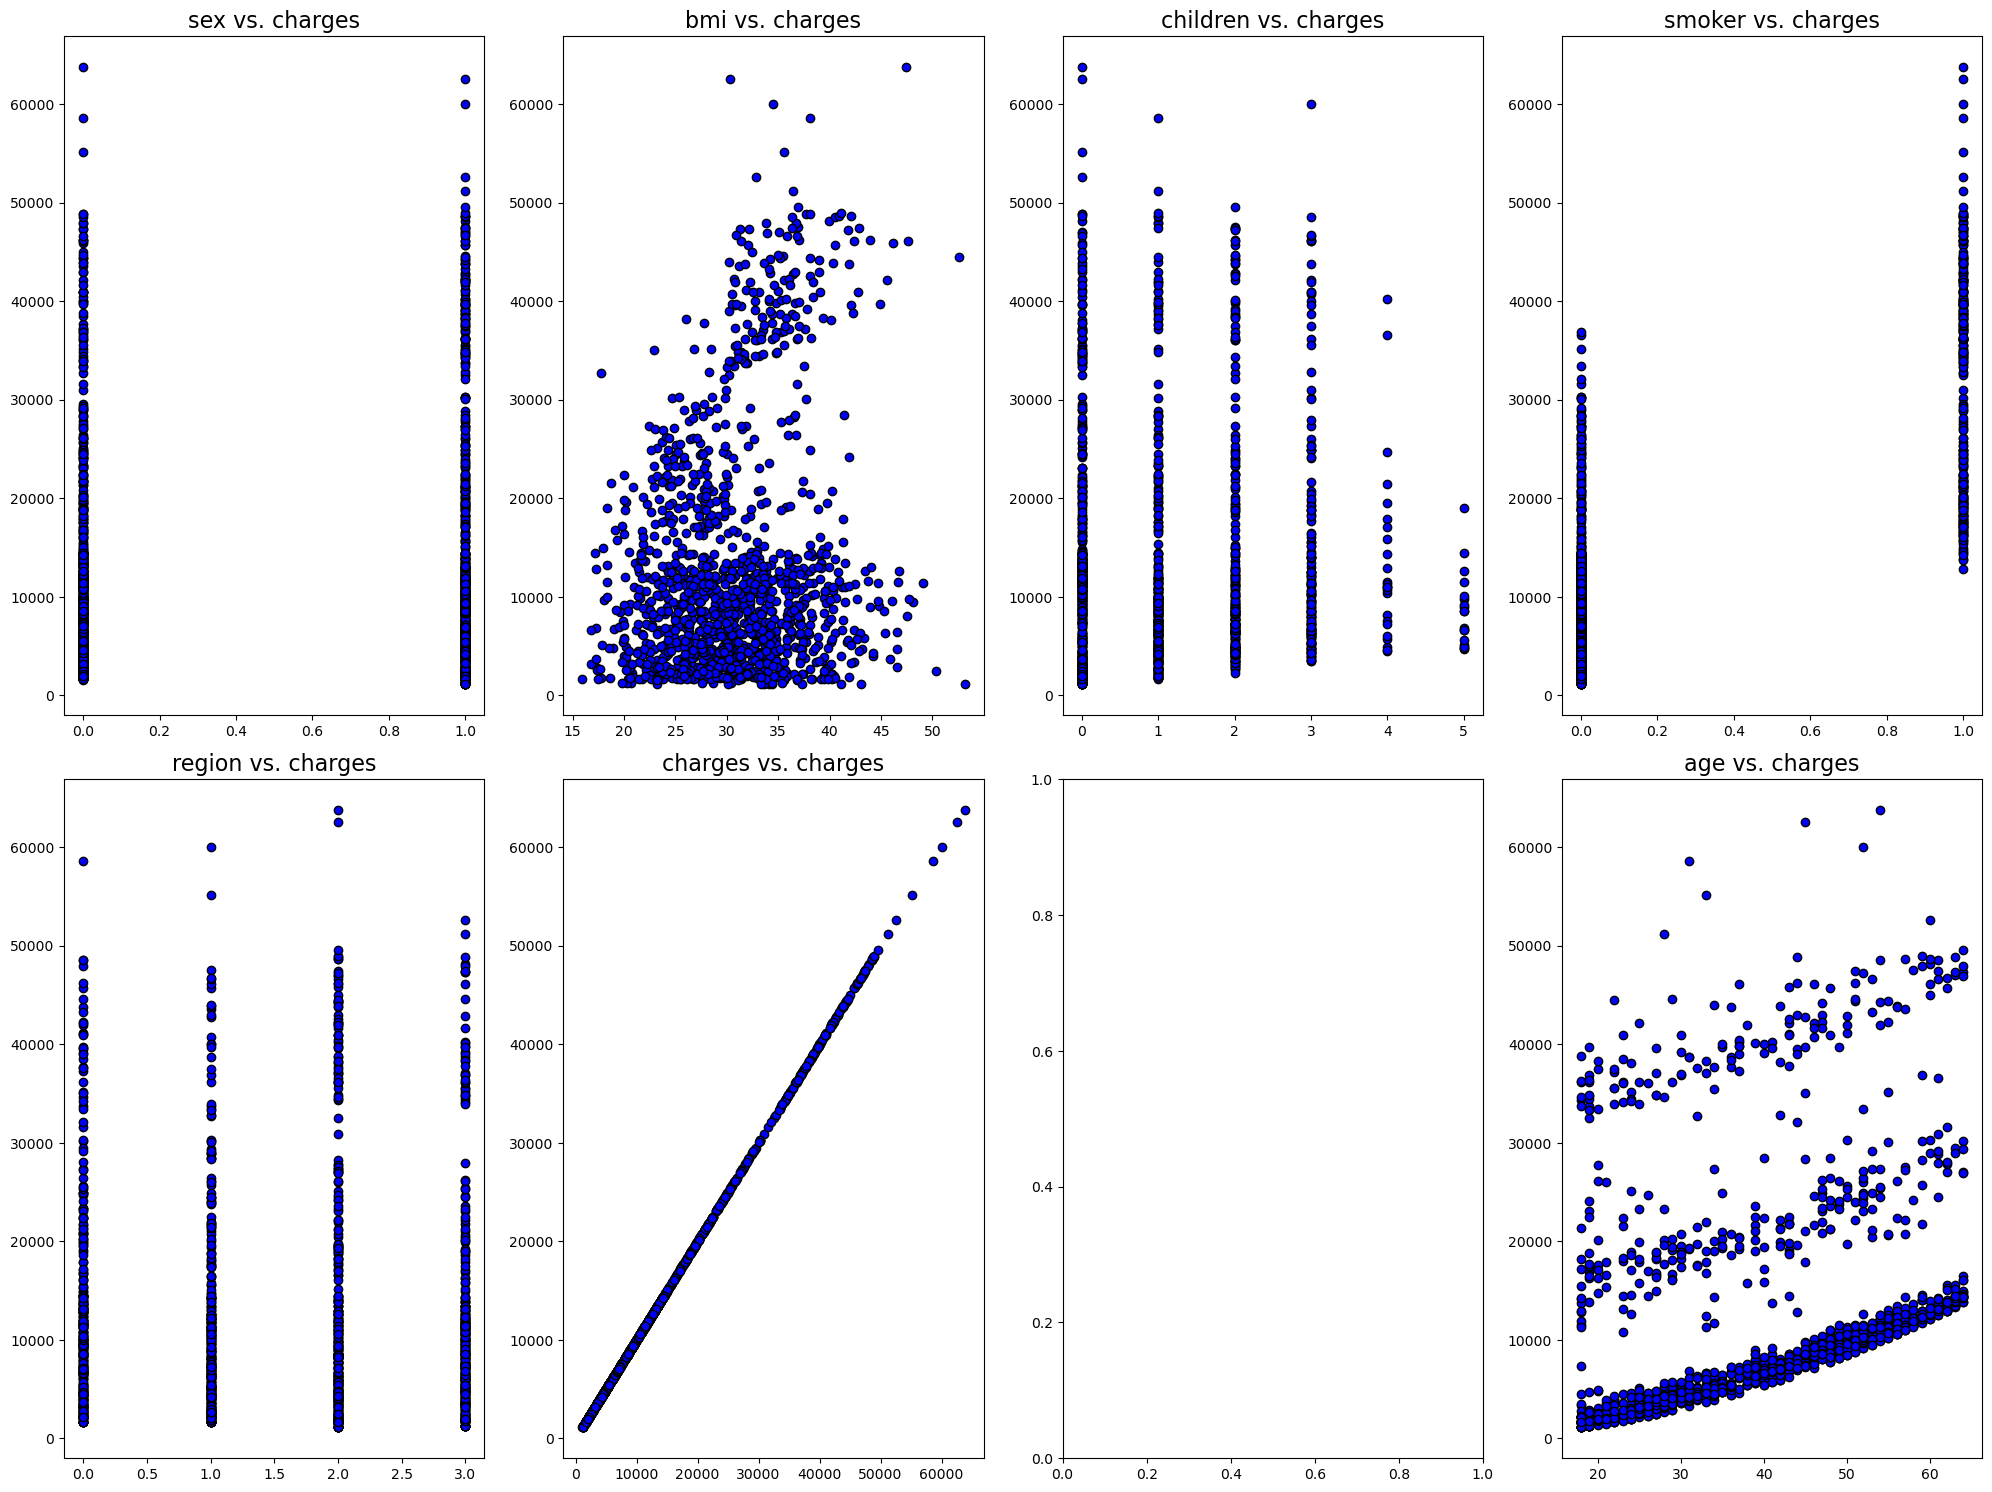

In [243]:
#price is on the y-axis and other features like cut, color,clarity are on the x-axis
fig, axs = plt.subplots(2,4, figsize=(20,15),)
fig.subplots_adjust(hspace = 0.8, wspace=.2)
axs = axs.ravel() 

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. charges".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['charges'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

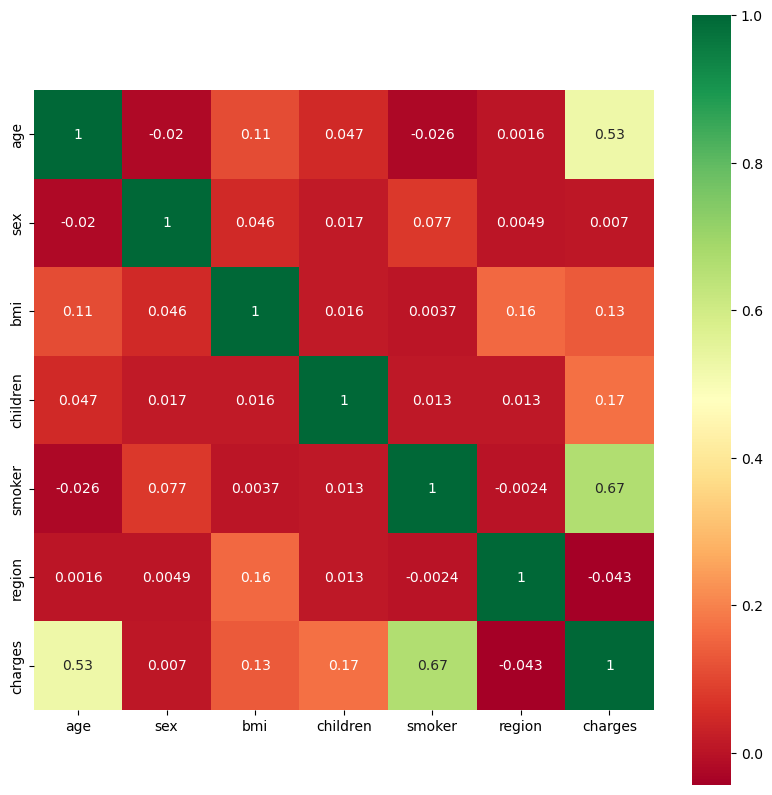

In [249]:
plt.figure(figsize=(10,10)) 
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

In [250]:
df.skew() 

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.262813
smoker      1.463601
region     -0.039068
charges    -0.089839
dtype: float64

<Axes: ylabel='Density'>

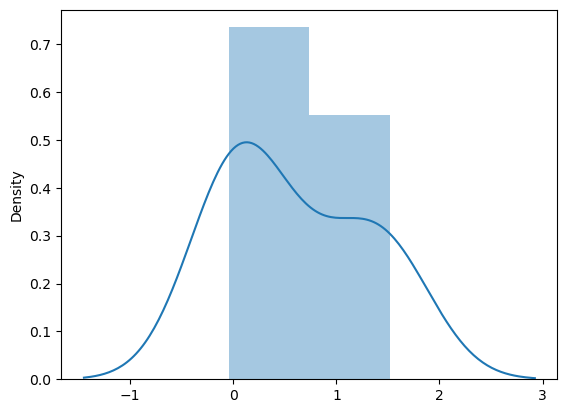

In [246]:
sk = df.skew()
sns.distplot(sk)

In [247]:
df['charges'] = np.log(df['charges'])

In [248]:
# Add a constant value to shift the data
constant = 1  # Choose an appropriate constant
df['children'] = df['children'] + constant
df['smoker'] = df['smoker'] + constant


# Apply log transformation
df['children'] = np.log(df['children'])
df['smoker'] = np.log(df['smoker'])


In [251]:
df.kurtosis()

age        -1.244406
sex        -2.002619
bmi        -0.052947
children   -1.343351
smoker      0.142339
region     -1.328392
charges    -0.634579
dtype: float64

<Axes: ylabel='Density'>

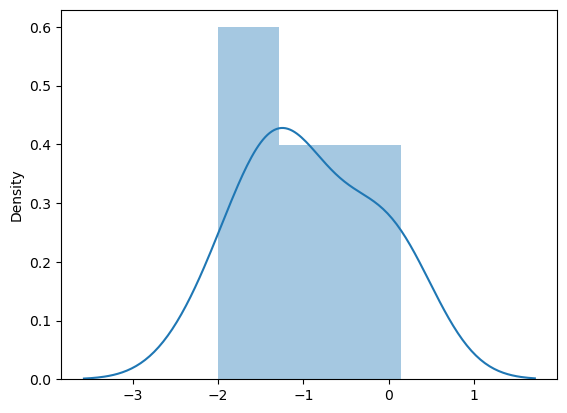

In [252]:
krt = df.kurtosis()
sns.distplot(krt)

In [214]:
# df = pd.DataFrame(df)

# features = ['age','smoker']
# target = 'charges'
# X = df[features]
# Y = df[target]

In [215]:
# #scalling the Data
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# df = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [253]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges', 'sex'], axis =1)
y = df.charges
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (935, 5)
x_test shape:  (402, 5)
y_train shape:  (935,)
y_test shape:  (402,)


In [254]:
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100, random_state=0)
lasso = Lasso(alpha=1.0)
StackingR = StackingRegressor(estimators=[('rf', rf), ('dt', dt)])

listr = [dt, rf, lasso, StackingR]

for model in listr:
    model.fit(x_train, y_train)
    
    test_predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)
    
    print(f"Model: {type(model).__name__}")
    print(f"Testing Mean Squared Error: {mse}")
    print(f"Testing R-squared: {r2}")

    train_predictions = model.predict(x_train)
    mse = mean_squared_error(y_train, train_predictions)
    r2 = r2_score(y_train, train_predictions)
    
    print(f"Model: {type(model).__name__}")
    print(f"Training Mean Squared Error: {mse}")
    print(f"Training R-squared: {r2}\n")


Model: DecisionTreeRegressor
Testing Mean Squared Error: 0.23417731013454293
Testing R-squared: 0.733860621808837
Model: DecisionTreeRegressor
Training Mean Squared Error: 3.5482151626585674e-05
Training R-squared: 0.9999571149253669

Model: RandomForestRegressor
Testing Mean Squared Error: 0.15688163343037348
Testing R-squared: 0.8217061236770318
Model: RandomForestRegressor
Training Mean Squared Error: 0.0243301268421689
Training R-squared: 0.970593685624239

Model: Lasso
Testing Mean Squared Error: 0.6210712796217821
Testing R-squared: 0.29416080458023297
Model: Lasso
Training Mean Squared Error: 0.6151696329527248
Training R-squared: 0.2564826423479214

Model: StackingRegressor
Testing Mean Squared Error: 0.15915655354606043
Testing R-squared: 0.8191207074184044
Model: StackingRegressor
Training Mean Squared Error: 0.03631667902289233
Training R-squared: 0.9561062838940968



In [255]:
RidgeR = Ridge(alpha=1.0)
LinearR = LinearRegression()
Adab = AdaBoostRegressor()

listr = [RidgeR, LinearR, Adab]

for model in listr:
    model.fit(x_train, y_train)
    
    test_predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)
    
    print(f"Model: {type(model).__name__}")
    print(f"Testing Mean Squared Error: {mse}")
    print(f"Testing R-squared: {r2}")

    train_predictions = model.predict(x_train)
    mse = mean_squared_error(y_train, train_predictions)
    r2 = r2_score(y_train, train_predictions)
    
    print(f"Model: {type(model).__name__}")
    print(f"Training Mean Squared Error: {mse}")
    print(f"Training R-squared: {r2}\n")


Model: Ridge
Testing Mean Squared Error: 0.18527281809336568
Testing R-squared: 0.7894399223615498
Model: Ridge
Training Mean Squared Error: 0.20330342281149288
Training R-squared: 0.7542797699475503

Model: LinearRegression
Testing Mean Squared Error: 0.18499763053466928
Testing R-squared: 0.7897526693382544
Model: LinearRegression
Training Mean Squared Error: 0.20323436839337744
Training R-squared: 0.7543632317371789

Model: AdaBoostRegressor
Testing Mean Squared Error: 0.22832805638057424
Testing R-squared: 0.7405082204001316
Model: AdaBoostRegressor
Training Mean Squared Error: 0.2218756948437703
Training R-squared: 0.7318326173455043



In [256]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Create regressor object
linear_regression = LinearRegression()

# Model Fitting
linear_regression.fit(x_train, y_train)

# Test Predictions
lr_test_y_pred = linear_regression.predict(x_test)

# Test assessment
mse = mean_squared_error(y_test, lr_test_y_pred)
r2 = r2_score(y_test, lr_test_y_pred)
print(f"Testing Mean Squared Error: {mse}")
print(f"Testing R-squared: {r2}")

# Train Predictions
lr_train_y_pred = linear_regression.predict(x_train)

# Train assessment
mse = mean_squared_error(y_train, lr_train_y_pred)
r2 = r2_score(y_train, lr_train_y_pred)
print(f"Training Mean Squared Error: {mse}")
print(f"Training R-squared: {r2}")


Testing Mean Squared Error: 0.18499763053466928
Testing R-squared: 0.7897526693382544
Training Mean Squared Error: 0.20323436839337744
Training R-squared: 0.7543632317371789


In [257]:
print(np.exp(lr_train_y_pred))
print("\n", np.exp(y_train))


[12717.239558   48525.18226309 24318.0720502  36631.71285139
 47572.26414403  4593.16598297 12950.4348136  32104.1851354
  5232.59298023  3236.17134852  6968.2254906  10973.51632203
 26775.34418353  3072.27224818  3484.20240156 12750.48306952
  5732.72335997  5073.30299586  7563.21497719  2418.42526173
 13066.37774393  5283.10809392  6552.97556569  3981.59016415
  5696.18279872  9242.52670611  7868.65901364  7110.06696701
  9396.54267975  3285.36877083  7381.92160684 21922.64675124
  6279.78522137 10822.3360049  13854.49727532  9007.56708526
  5360.76298467  3849.0100282   4856.39315985  8551.86780642
 38225.27005396 13642.73226964 57601.65940871 14893.05294154
 10309.40643135  2899.06884329  2670.10194882  2852.96456672
  7508.96616027 20918.88244084  8531.14754152  4244.92569673
  9149.75375842  9204.95736934  4071.38278391  4337.43243225
  4315.00981727 11620.29893639  9760.83968583  5743.66874226
  4792.87604897  4063.80776893 15658.30761941 14658.99665387
 34826.75311399  4087.507

In [258]:
print(np.exp(lr_test_y_pred))
print("\n", np.exp(y_test))

[ 7726.78719706  5046.62242362 12596.08770937 28680.14523886
  5911.01751711 10821.99886304 21952.57982698  2801.38082883
  7919.91737646 10698.39543553 11021.05065338 40477.84404364
 26450.33609043 13556.6176892   7282.18062838  8153.22700828
  3361.82292997 28673.85401015  4002.58650812  4553.8078436
  3024.41676893 28302.61218291 11534.410984   28100.21948923
 23375.47838294  4111.69490491 40808.06991641 52772.89765655
  9875.94004458 12247.57933218  4639.06441681 10241.21780467
  2893.41161339 11923.27108021 53446.40867231  9850.34539661
  3863.01482732  5015.33869413 37246.97284547  7991.56951409
  3798.03041879 35441.7289459  42452.05051392 10775.19798428
  8167.48411326  3503.68264873  3331.88033483  7105.53845624
  4368.47850707  7212.52415431  4991.56141329  7036.01030356
 34757.19355702  3036.74938723  8031.44904933  8385.26587486
 10186.01182962  3779.67720802 26053.85041474  7848.82581868
 12631.07230865  5918.83826239 11595.65950077  2798.22276271
 13392.25538349 11292.624

In [259]:
model_save_path = "rf.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(linear_regression,file)

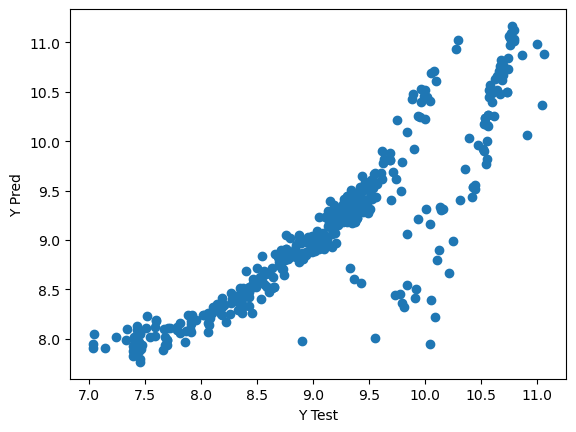

In [260]:
plt.scatter(y_test, lr_test_y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.show()

In [263]:
import pandas as pd

data = {'age': 50, 'bmi': 27,'children': 2, 'smoker': 1, 'region': 3}
index = [0]  # Assuming you want to set the index to 0
cust_df = pd.DataFrame(data, index=index)
cust_df

,age,bmi,children,smoker,region
0,50,27,2,1,3


In [264]:
cost_pred = linear_regression.predict(cust_df)
print("insurance charges: ",cost_pred )

insurance charges:  [11.55220194]


In [ ]:
df